## Import and warehouse data: 

**Common Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Using MYSQL  

**Prerquisite**
* The tables (i.e. TELECOM_CUSTOMER1 and TELECOM_CUSTOMER2) are present on the mysql database.
* All the data has been imported into the respective tables.

***Note:***
* We have assumed that the data have been inserted into both the tables in the same order.

In [2]:
# install mysql-connector-python library/package for connecting to mysql database
# pip install mysql-connector-python

In [3]:
#import mysql.connector
#connection = mysql.connector.connect(user='root', password='root', host='localhost', database='mysql')

In [4]:
#data1 = pd.read_sql(sql='SELECT * FROM telecom.TELECOM_CUSTOMER1;', con=connection)

In [5]:
#data2 = pd.read_sql(sql='SELECT * FROM telecom.TELECOM_CUSTOMER2', con=connection)

In [6]:
#data1.shape

(7043, 10)

In [7]:
#data2.shape

(7043, 11)

In [8]:
#data1.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternalService',
       'OnlineSecurity'],
      dtype='object')

In [9]:
#data2.columns

Index(['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

As there are no duplicate columns in both the tables and also the number of records in both these tables are same. So, we can merge these two dataframes to create our final data set.

In [10]:
#data = pd.concat([data1, data2], axis=1)

In [11]:
#data.shape

(7043, 21)

In [12]:
#data.head()

CustomerID  Gender SeniorCitizen Partner Dependents Tenure PhoneService  \
0  7590-VHVEG  Female             0     Yes         No      1           No   
1  5575-GNVDE    Male             0      No         No     34          Yes   
2  3668-QPYBK    Male             0      No         No      2          Yes   
3  7795-CFOCW    Male             0      No         No     45           No   
4  9237-HQITU  Female             0      No         No      2          Yes   

      MultipleLines InternalService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges Churn  
0           Electronic check          29.85        29.85    No  
1               Mailed check          56.95       1889.5    No  
2               Mailed check          53.85       108.15   Yes  
3  Bank transfer (automatic)           42.3      1840.75    No  
4           Electronic check           70.7       151.65   Yes  

[5 rows x 21 columns]

In [13]:
#data.dtypes

CustomerID          object
Gender              object
SeniorCitizen       object
Partner             object
Dependents          object
Tenure              object
PhoneService        object
MultipleLines       object
InternalService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

In [14]:
#data['SeniorCitizen'] = pd.to_numeric(data['SeniorCitizen'], errors='coerce')
#data['Tenure'] = pd.to_numeric(data['Tenure'], errors='coerce')
#data['MonthlyCharges'] = pd.to_numeric(data['MonthlyCharges'], errors='coerce')
#data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

### Using Pandas Direct Import  

In [15]:
data = pd.read_csv('TelcomCustomer-Churn.csv')

In [16]:
data.shape

(7043, 21)

In [17]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

## Data cleansing: 

In [18]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Observations:**<br/>
The data type of the TotalCharges column is object instead of float64, which means the column might have some missing or non-numeric data.

In [19]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [20]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Observations:**<br/>
There are missing(i.e. null) values in the TotalCharges columns which needs to be imputed.

In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(data[['TotalCharges']])

data[['TotalCharges']] = imputer.transform(data[['TotalCharges']])

In [22]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [24]:
print(f'Number of records with Tenure column having Zeros(0): {len(data[data.tenure == 0])}')
print(f'Number of records with Monthly Charges column having Zeros(0): {len(data[data.MonthlyCharges == 0])}')
print(f'Number of records with Total Charges having Zeros(0): {len(data[data.TotalCharges == 0])}')

Number of records with Tenure column having Zeros(0): 11
Number of records with Monthly Charges column having Zeros(0): 0
Number of records with Total Charges having Zeros(0): 0


**Observations:**<br/>
* We can see there are records which has zero(0) for the tenure column. And this seems to be data entry issue or missing values which needs to be imputed.

In [25]:
# Before imputing, pickle the mean/median of the numerical columns for 
# imputing missing/zero value recieved from GUI
import pickle

imputeVar = {
    'tenureMedian': data['tenure'].median(),
    'monthlyChargesMedian': data['MonthlyCharges'].median(),
    'totalChargesMedian': data['TotalCharges'].median()
}

with open('imputerVar.pkl', 'wb') as file:
    pickle.dump(imputeVar, file)

In [26]:
imputer = SimpleImputer(missing_values=0, strategy='median')
imputer.fit(data[['tenure']])
data[['tenure']] = imputer.transform(data[['tenure']])

In [27]:
print(f'Number of records with Tenure column having Zeros(0): {len(data[data.tenure == 0])}')

Number of records with Tenure column having Zeros(0): 0


**Observations:**<br/>
As we can all the records with zero(0) in tenure column has been imputed successfully.

**Checking for missing values in categorical columns**

In [28]:
print(data['gender'].value_counts())
print(data['Partner'].value_counts())
print(data['Dependents'].value_counts())
print(data['PhoneService'].value_counts())
print(data['MultipleLines'].value_counts())
print(data['InternetService'].value_counts())
print(data['OnlineSecurity'].value_counts())
print(data['OnlineBackup'].value_counts())
print(data['DeviceProtection'].value_counts())
print(data['TechSupport'].value_counts())
print(data['StreamingTV'].value_counts())
print(data['StreamingMovies'].value_counts())
print(data['Contract'].value_counts())
print(data['PaperlessBilling'].value_counts())
print(data['PaymentMethod'].value_counts())
print(data['Churn'].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV

**Observations:**<br/>
* **Gender** column has 2 possible values: **Male/Female**
* **Partner** column has 2 possible values: **Yes/No**
* **Dependents** column has 2 possible values: **Yes/No**
* **PhoneService** column has 2 possible values: **Yes/No**
* **MultipleLines** column has 3 possible values: **Yes/No/No phone service**
* **InternetService** column has 3 possible values: **Fiber optic/DSL/No**
* **OnlineSecurity** column has 3 possible values: **Yes/No/No internet service**
* **OnlineBackup** column has 3 possible values: **Yes/No/No internet service**
* **DeviceProtection** column has 3 possible values: **Yes/No/No internet service**
* **TechSupport** column has 3 possible values: **Yes/No/No internet service**
* **StreamingTV** column has 3 possible values: **Yes/No/No internet service**
* **StreamingMovies** column has 3 possible values: **Yes/No/No internet service**
* **Contract** column has 3 possible values: **Month-to-month/Two year/One year**
* **PaperlessBilling** column has 2 possible values: **Yes/No**
* **PaymentMethod** column has 4 possible values: **Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic)**
* **Churn** column has 2 possible values: **Yes/No**

In [29]:
for column in data.columns:
    if data[column].dtype == object:
        data[column] = pd.Categorical(data[column])

In [30]:
data.dtypes

customerID          category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure               float64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [31]:
# Take a copy of the data before encoding categorical attributes for Data analysis and visualisation
dataCopy = data.copy(deep=True)

**Dealing with Categorical features:**


In [32]:
replaceStruct = {
    'Contract':{'Month-to-month':1, 'One year':2, 'Two year':3},
    'PaymentMethod':{'Mailed check':'manual', 'Electronic check':'manual', 'Bank transfer (automatic)':'automatic', 
                     'Credit card (automatic)':'automatic'},
    'Churn':{'No':0, 'Yes':1},
    
    # For MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
    # columns, we can consider No internet service as No to simplify the OneHotEncode
    'MultipleLines':{'No phone service':'No'},
    'OnlineSecurity':{'No internet service':'No'},
    'OnlineBackup':{'No internet service':'No'},
    'DeviceProtection':{'No internet service':'No'},
    'TechSupport':{'No internet service':'No'},
    'StreamingTV':{'No internet service':'No'},
    'StreamingMovies':{'No internet service':'No'},
}

oneHotCols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'PaperlessBilling', 'PaymentMethod']

In [33]:
data = data.replace(replaceStruct)

In [34]:
from sklearn.preprocessing import OneHotEncoder

oneHotEncoder = OneHotEncoder(sparse=False)
oneHotEncodedValues = oneHotEncoder.fit_transform(data[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'PaperlessBilling', 'PaymentMethod']])

oneHotEncodedFeatures = oneHotEncoder.get_feature_names(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'PaperlessBilling', 'PaymentMethod'])


In [35]:
#pickle the OneHotEncoder for using in the GUI

with open('oneHotEncoder.pkl', 'wb') as file:
    pickled_OneHotEncoder = pickle.dump(oneHotEncoder, file)

In [36]:
df_OneHotEncodedValues = pd.DataFrame(oneHotEncodedValues, columns=oneHotEncodedFeatures)

In [37]:
data = data.drop(labels=oneHotCols, axis=1)

In [38]:
data = data.join(df_OneHotEncodedValues)

In [39]:
data.head(10)

customerID  SeniorCitizen  tenure  Contract  MonthlyCharges  TotalCharges  \
0  7590-VHVEG              0     1.0         1           29.85         29.85   
1  5575-GNVDE              0    34.0         2           56.95       1889.50   
2  3668-QPYBK              0     2.0         1           53.85        108.15   
3  7795-CFOCW              0    45.0         2           42.30       1840.75   
4  9237-HQITU              0     2.0         1           70.70        151.65   
5  9305-CDSKC              0     8.0         1           99.65        820.50   
6  1452-KIOVK              0    22.0         1           89.10       1949.40   
7  6713-OKOMC              0    10.0         1           29.75        301.90   
8  7892-POOKP              0    28.0         1          104.80       3046.05   
9  6388-TABGU              0    62.0         2           56.15       3487.95   

   Churn  gender_Female  gender_Male  Partner_No  ...  TechSupport_No  \
0      0            1.0          0.0         0.0  ...             1.0   
1      0            0.0          1.0         1.0  ...             1.0   
2      1            0.0          1.0         1.0  ...             1.0   
3      0            0.0          1.0         1.0  ...             0.0   
4      1            1.0          0.0         1.0  ...             1.0   
5      1            1.0          0.0         1.0  ...             1.0   
6      0            0.0          1.0         1.0  ...             1.0   
7      0            1.0          0.0         1.0  ...             1.0   
8      1            1.0          0.0         0.0  ...             0.0   
9      0            0.0          1.0         1.0  ...             1.0   

   TechSupport_Yes  StreamingTV_No  StreamingTV_Yes  StreamingMovies_No  \
0              0.0             1.0              0.0                 1.0   
1              0.0             1.0              0.0                 1.0   
2              0.0             1.0              0.0                 1.0   
3              1.0             1.0              0.0                 1.0   
4              0.0             1.0              0.0                 1.0   
5              0.0             0.0              1.0                 0.0   
6              0.0             0.0              1.0                 1.0   
7              0.0             1.0              0.0                 1.0   
8              1.0             0.0              1.0                 0.0   
9              0.0             1.0              0.0                 1.0   

   StreamingMovies_Yes  PaperlessBilling_No  PaperlessBilling_Yes  \
0                  0.0                  0.0                   1.0   
1                  0.0                  1.0                   0.0   
2                  0.0                  0.0                   1.0   
3                  0.0                  1.0                   0.0   
4                  0.0                  0.0                   1.0   
5                  1.0                  0.0                   1.0   
6                  0.0                  0.0                   1.0   
7                  0.0                  1.0                   0.0   
8                  1.0                  0.0                   1.0   
9                  0.0                  1.0                   0.0   

   PaymentMethod_automatic  PaymentMethod_manual  
0                      0.0                   1.0  
1                      0.0                   1.0  
2                      0.0                   1.0  
3                      1.0                   0.0  
4                      0.0                   1.0  
5                      0.0                   1.0  
6                      1.0                   0.0  
7                      0.0                   1.0  
8                      0.0                   1.0  
9                      1.0                   0.0  

[10 rows x 36 columns]

In [40]:
#Drop attribute/s if required using relevant functional knowledge

# As the customerID column data is not useful for model building, we can drop the column
data = data.drop(labels=['customerID'], axis=1)

In [41]:
#Automate all the above steps

def prepare_data(data):
    """
    This function is for preparing the data for model building.
    
    * Imputes missing values
    * Encodes categorical attributes
    * Drops columns which are not required for model building
    
    args:
    data: input dataframe
    
    return: data for model building
    """
    # imports
    import numpy as np
    import pandas as pd
    from sklearn.impute import SimpleImputer
    
    tempData = data.copy(deep=True)
    
    # Change the datatype of the numeric columns/attributes
    tempData['SeniorCitizen'] = pd.to_numeric(tempData['SeniorCitizen'], errors='coerce')
    tempData['tenure'] = pd.to_numeric(tempData['tenure'], errors='coerce')
    tempData['MonthlyCharges'] = pd.to_numeric(tempData['MonthlyCharges'], errors='coerce')
    tempData['TotalCharges'] = pd.to_numeric(tempData['TotalCharges'], errors='coerce')
    
    # Change the datatype of categorical columns/attributes
    for column in tempData.columns:
        if tempData[column].dtype == object:
            tempData[column] = pd.Categorical(tempData[column])
            
    # Impute the missing values in the numeric columns
    imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imputer.fit(tempData[['SeniorCitizen']])
    tempData[['SeniorCitizen']] = imputer.transform(tempData[['SeniorCitizen']])
    
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    imputer.fit(tempData[['tenure']])
    tempData[['tenure']] = imputer.transform(tempData[['tenure']])
    
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    imputer.fit(tempData[['MonthlyCharges']])
    tempData[['MonthlyCharges']] = imputer.transform(tempData[['MonthlyCharges']])
    
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    imputer.fit(tempData[['TotalCharges']])
    tempData[['TotalCharges']] = imputer.transform(tempData[['TotalCharges']])
    
    # Impute the zero(0) values for tenure, MonthlyCharges and TotalCharges columns
    if len(tempData[tempData['tenure'] == 0]) != 0:
        imputer = SimpleImputer(missing_values=0, strategy='median')
        imputer.fit(tempData[['tenure']])
        tempData[['tenure']] = imputer.transform(tempData[['tenure']])
        
    if len(tempData[tempData['MonthlyCharges'] == 0]) != 0:
        imputer = SimpleImputer(missing_values=0, strategy='median')
        imputer.fit(tempData[['MonthlyCharges']])
        tempData[['MonthlyCharges']] = imputer.transform(tempData[['MonthlyCharges']])

    if len(tempData[tempData['TotalCharges'] == 0]) != 0:
        imputer = SimpleImputer(missing_values=0, strategy='median')
        imputer.fit(tempData[['TotalCharges']])
        tempData[['TotalCharges']] = imputer.transform(tempData[['TotalCharges']])

    
    # Perform LabelEncoding/OneHotEncoding for categorical attributes
    replaceStruct = {
        'Contract':{'Month-to-month':1, 'One year':2, 'Two year':3},
        'PaymentMethod':{'Mailed check':'manual', 'Electronic check':'manual', 'Bank transfer (automatic)':'automatic', 
                     'Credit card (automatic)':'automatic'},
        'Churn':{'No':0, 'Yes':1},
    
        # For MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
        # columns, we can consider No internet service as No
        'MultipleLines':{'No phone service':'No'},
        'OnlineSecurity':{'No internet service':'No'},
        'OnlineBackup':{'No internet service':'No'},
        'DeviceProtection':{'No internet service':'No'},
        'TechSupport':{'No internet service':'No'},
        'StreamingTV':{'No internet service':'No'},
        'StreamingMovies':{'No internet service':'No'},
    }

    oneHotCols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'PaperlessBilling']
    
    tempData = tempData.replace(replaceStruct)
    tempData = pd.get_dummies(tempData, columns=oneHotCols)
    
    tempData = tempData.drop(labels=['customerID'], axis=1)
    
    return tempData

## Data analysis & visualisation: 

In [42]:
dataCopy.describe().T

count         mean          std    min      25%       50%  \
SeniorCitizen   7043.0     0.162147     0.368612   0.00    0.000     0.000   
tenure          7043.0    32.416442    24.526454   1.00    9.000    29.000   
MonthlyCharges  7043.0    64.761692    30.090047  18.25   35.500    70.350   
TotalCharges    7043.0  2281.916928  2265.270398  18.80  402.225  1397.475   

                    75%      max  
SeniorCitizen      0.00     1.00  
tenure            55.00    72.00  
MonthlyCharges    89.85   118.75  
TotalCharges    3786.60  8684.80

**Observations:**<br/>
From the above statistical data we can see
* Most of the Customers are not senior citizen.
* The Minimum tenure of customers is 1 where as the maximum tenure is 72. There is difference between the mean and the median of the tenure data which suggests there could be skewness in the distribution of the data.
* The minimum monthly charges for customer is 18.25 where as the maximum is 118.75. As there is difference between the mean and the median, there could be skewness in the distribution of the data for Monthly Charges column.
* The minimum total charges for customer is 18.80 whereas the maximum total charge is 8684.80. As the difference between the mean and the median is huge, there is high skewness in the distribution of the data. Also, as the 3rd quartile is 3786.60 and the maximum is 8684.80, there is possibility that extreme outliers are present for TotalCharges attribute.

### Univariate Analysis 

<AxesSubplot:xlabel='gender', ylabel='count'>

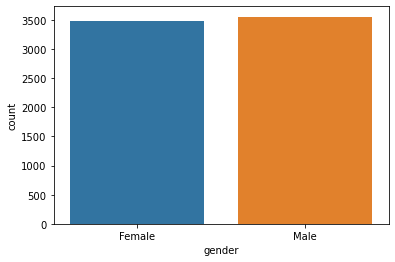

In [43]:
sns.countplot(data=dataCopy, x='gender')

**Observations:**<br/>
From the above coutnplot for the Gender attribute data we can observe
* Number of Male customers is marginally higher than the number of female customers.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

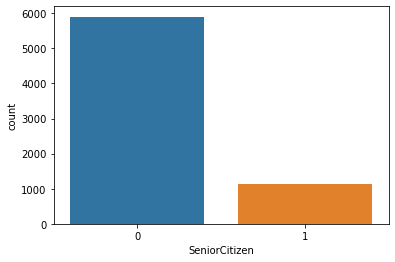

In [44]:
sns.countplot(data=data, x='SeniorCitizen')

**Observations:**<br/>
From the above coutnplot for the SeniorCitizen attribute data we can observe
* Number of customer who are senior citizen is less(i.e. 1000).

No     3641
Yes    3402
Name: Partner, dtype: int64


<AxesSubplot:xlabel='Partner', ylabel='count'>

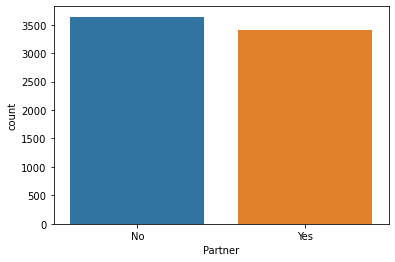

In [45]:
print(dataCopy['Partner'].value_counts())
sns.countplot(data=dataCopy, x='Partner')

**Observations:**<br/>
From the above coutnplot for the Partner attribute data we can observe
* Number of customers without partner(i.e. 3641) is more than the number of customers who are having partners(3402).

<AxesSubplot:xlabel='Dependents', ylabel='count'>

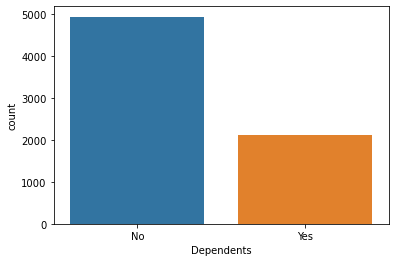

In [46]:
sns.countplot(data=dataCopy, x='Dependents')

**Observations:**<br/>
From the above coutnplot for the Dependents attribute data we can observe
* Number of customers with out dependents are more compared to customers with dependents.

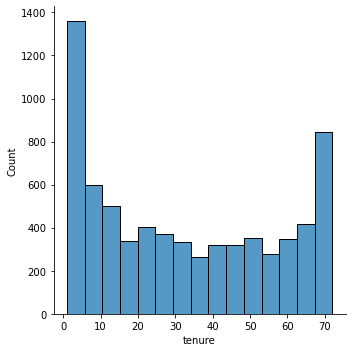

In [47]:
sns.displot(data=data, x='tenure')

**Observations:**<br/>
From the above distribution plot for the tenure attribute data we can observe
* The data for tenure is not normally distributed.
* Out of all the tenure ranges, 1-5 has highes number of customers.
* Most of the customers are having tenure in the range of 10-65.

Yes    6361
No      682
Name: PhoneService, dtype: int64


<AxesSubplot:xlabel='PhoneService', ylabel='count'>

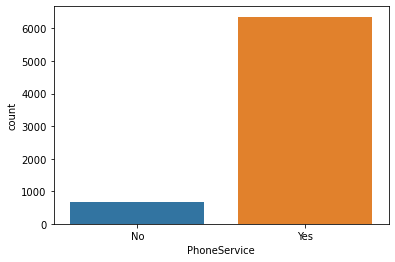

In [48]:
print(dataCopy['PhoneService'].value_counts())
sns.countplot(data=dataCopy, x='PhoneService')

**Observations:**<br/>
From the above coutnplot for the PhoneService attribute data we can observe
* Most of the customers are having Phone Service, where as only 682 are not having Phone Service.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

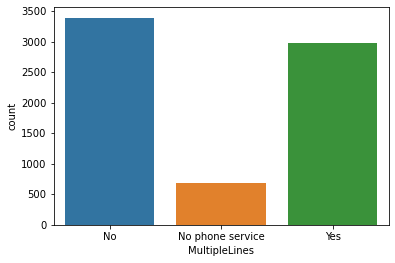

In [49]:
print(dataCopy.MultipleLines.value_counts())
sns.countplot(data=dataCopy, x='MultipleLines')

**Observations:**<br/>
From the above coutnplot for the MultipleLines attribute data we can observe
* The 682 customer who didn't have Phone Services are not having Multiple Lines.
* Out of all the customer who have Phone Service, 3390 don't have Multiple Lines where as 2971 customer are having Multiple Lines.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


<AxesSubplot:xlabel='InternetService', ylabel='count'>

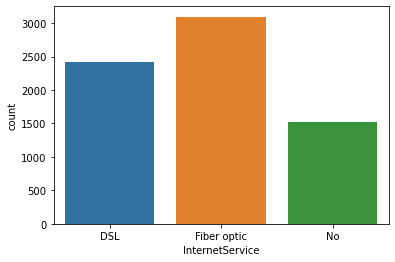

In [50]:
print(dataCopy.InternetService.value_counts())
sns.countplot(data=dataCopy, x='InternetService')

**Observations:**<br/>
From the above coutnplot for the Internet Service attribute data we can observe
* 1526 customers are not having internet service, 2421 customers are having DSL internet service and 3096 customers are having Fiber optic.
* Customers are prefering Fiber optic as compared to DSL for internet service.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

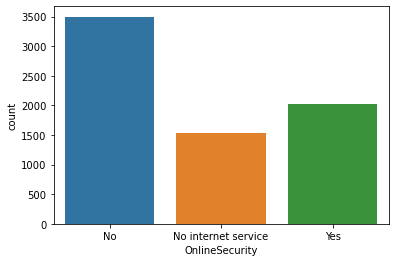

In [51]:
print(dataCopy.OnlineSecurity.value_counts())
sns.countplot(data=dataCopy, x='OnlineSecurity')

**Observations:**<br/>
From the above coutnplot for the OnlineSecurity attribute data we can observe
* 1526 customer who don't have internet service don't need to have Online Security.
* 2019 customers have opted for online security where as 3498 customers don't have online security.
* out of all customers who have internet service, most of them don't have online security.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

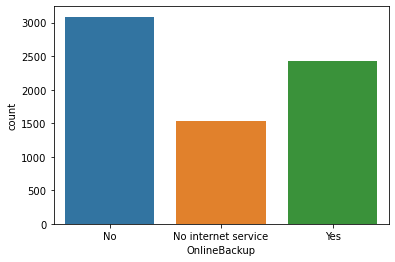

In [52]:
print(dataCopy.OnlineBackup.value_counts())
sns.countplot(data=dataCopy, x='OnlineBackup')

**Observations:**<br/>
From the above coutnplot for the Online Backup attribute data we can observe
* 1526 customers who don't have internet service don't need to have online backup facility.
* Out of all customers who have internet service,3088 don't have online backup where as 2429 customers have online backup.
* Out of all the customers who have internet service, most are not having online backup.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

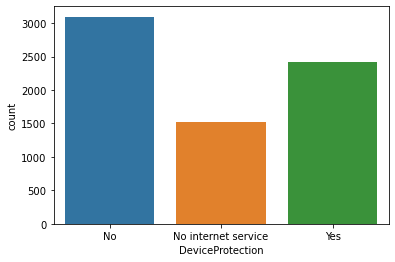

In [53]:
print(dataCopy.DeviceProtection.value_counts())
sns.countplot(data=dataCopy, x='DeviceProtection')

**Observations:**<br/>
From the above coutnplot for the Device Protection attribute data we can observe
* 1526 customers who don't have internet service don't need to have Device Protection facility.
* Out of all customers who have internet service,3095 don't have devcie protection where as 2422 customers have device protection.
* Out of all the customers who have internet service, most are not having device protection.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


<AxesSubplot:xlabel='TechSupport', ylabel='count'>

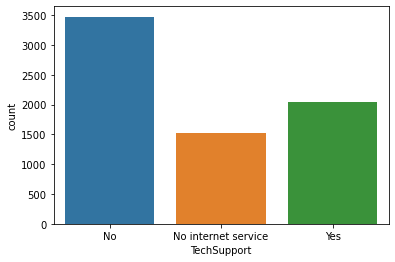

In [54]:
print(dataCopy.TechSupport.value_counts())
sns.countplot(data=dataCopy, x='TechSupport')

**Observations:**<br/>
From the above coutnplot for the Tech Support attribute data we can observe
* 1526 customers who don't have internet service don't need to have Tech support facility.
* Out of all customers who have internet service,3473 don't have tech support where as 2422 customers have tech support.
* Out of all the customers who have internet service, most are not having tech support.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

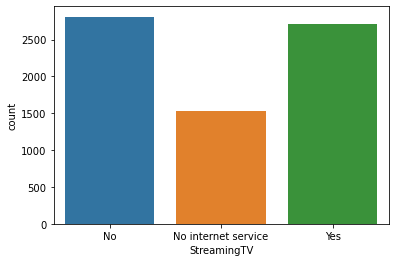

In [55]:
print(dataCopy.StreamingTV.value_counts())
sns.countplot(data=dataCopy, x='StreamingTV')

**Observations:**<br/>
From the above coutnplot for the StreamingTV attribute data we can observe
* 1526 customers who don't have internet service don't need to have StreamingTV facility.
* Out of all customers who have internet service, 2810 don't have StreamingTV where as 2707 customers have StreamingTV.
* Out of all the customers who have internet service, numebr of customer having StreamingTV and who don't have StreamingTV are nearly same.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

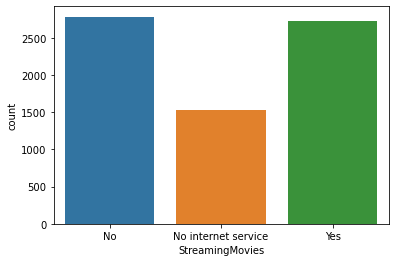

In [56]:
print(dataCopy.StreamingMovies.value_counts())
sns.countplot(data=dataCopy, x='StreamingMovies')

**Observations:**<br/>
From the above coutnplot for the Streaming Movies attribute data we can observe
* 1526 customers who don't have internet service don't need to have Streaming Movies facility.
* out of customers who have internet service, 2785 don't have Streaming Movies where as 2732 customers have Streaming Movies.
* Out of all the customers who have internet service, numebr of customer having StreamingMovies and who don't have StreamingMovies are nearly same..

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


<AxesSubplot:xlabel='Contract', ylabel='count'>

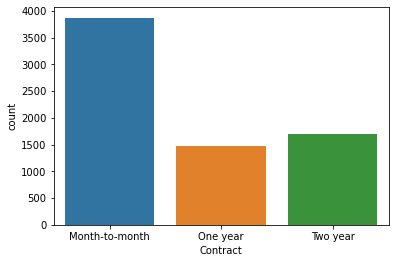

In [57]:
print(dataCopy.Contract.value_counts())
sns.countplot(data=dataCopy, x='Contract')

**Observations:**<br/>
From the above coutnplot for the Contract attribute data we can observe
* 3875 customers are having monthly renewable contract.
* 1473 customers are having yearly contract and 1695 customers are having two year contract.
* Most of the customers are having monthly contract.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

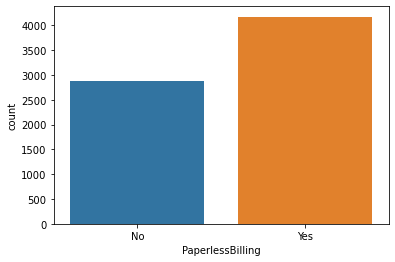

In [58]:
print(dataCopy.PaperlessBilling.value_counts())
sns.countplot(data=dataCopy, x='PaperlessBilling')

**Observations:**<br/>
From the above coutnplot for the PaperlessBilling attribute data we can observe
* 4171 customers have opted for paperless billing where as 2872 customers didn't opt for paperless billing.
* Most of the customers are in favor of paperless billing.

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

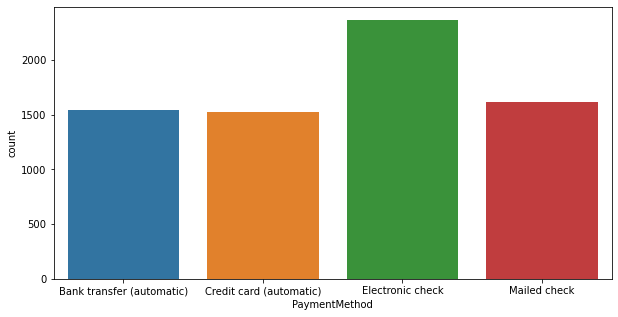

In [59]:
print(dataCopy.PaymentMethod.value_counts())
plt.figure(figsize=(10,5))
sns.countplot(data=dataCopy, x='PaymentMethod')

**Observations:**<br/>
From the above coutnplot for the Payment Method attribute data we can observe
* 1612 customers have opted for Mailed check method of payment.
* 2365 customers have opted for Electronic check method of payment.
* 1544 and 1522 customers have opted for Bank transer(automatic) and Credit card(automatic) payment methods respectively.
* Most of the customers prefer electronic check method as payment method.

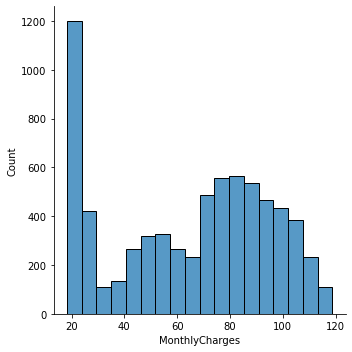

In [60]:
sns.displot(data=data, x='MonthlyCharges')

**Observations:**<br/>
From the above distribution plot for the Monthly Charges attribute data we can observe
* The data for monthly charges is not normally distributed.
* Out of all the monthly charge ranges, 8-22 has highest number of customers.
* Most of the customers are having monthly charges in the range of 40-105.

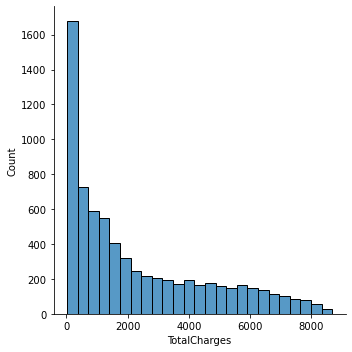

In [61]:
sns.displot(data=data, x='TotalCharges')

**Observations:**<br/>
From the above distribution plot for the Total Charges attribute data we can observe
* The data for total charges is not normally distributed.
* Out of all the total charges ranges, 0-400 has highest number of customers.
* Most of the customers are having total charges in the range of 0-2000.

No     5174
Yes    1869
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

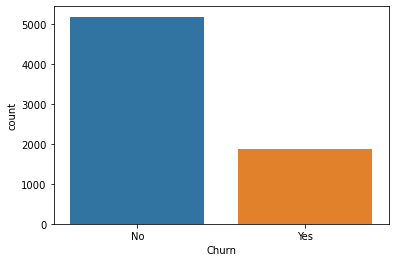

In [62]:
print(dataCopy.Churn.value_counts())
sns.countplot(data=dataCopy, x='Churn')

**Observations:**<br/>
From the above coutnplot for the Churn attribute data we can observe
* 5174 customers haven't left/churned from the telecom company.
* 1869 customers have left/churned from the telecom company.
* We can see the target variables data is higly unbalanced.

### Bivariate Analysis 

In [63]:
dataCopy.corr()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.015777        0.220173      0.102652
tenure               0.015777  1.000000        0.246801      0.825855
MonthlyCharges       0.220173  0.246801        1.000000      0.650864
TotalCharges         0.102652  0.825855        0.650864      1.000000

**Observations:**<br/>
From the above correlation table we can observe
* There seems to be strong possitive co-relation between the Tenure and Total Charges features.

<AxesSubplot:>

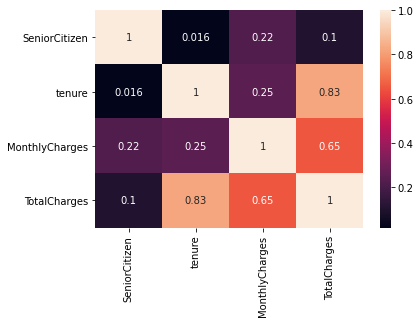

In [64]:
sns.heatmap(dataCopy.corr(), annot=True)

**Observations:**<br/>
From the above heatmap we can observe 
* There is strong positive co-relation between tenure and total charges.
* There is bit of positive co-relation between monthly charges and total charges.

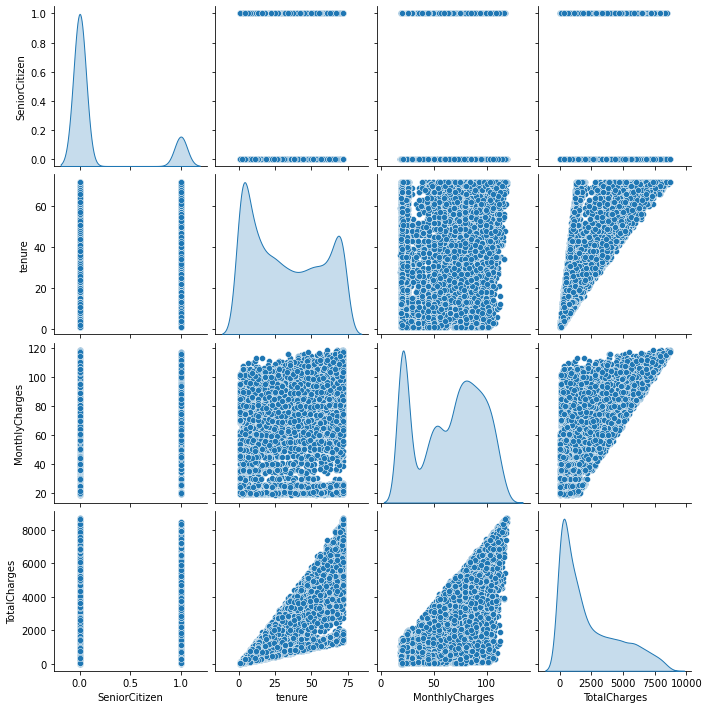

In [65]:
sns.pairplot(data=dataCopy, diag_kind='kde')

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

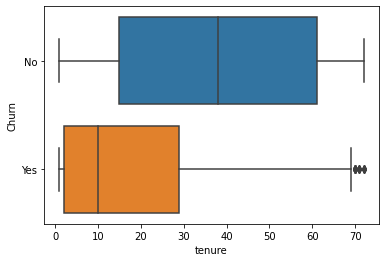

In [66]:
sns.boxplot(data=dataCopy, x='tenure', y='Churn')

**Observations:**<br/>
From the above box plot for tenure against churn we can observe.
* The IQR of tenure for customer who left/churned from telecom comapany is less compared to the IQR of tenure for the customers who didn't left/churned.
* Also, there are few outliers present in tenure data for the customer who churned.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

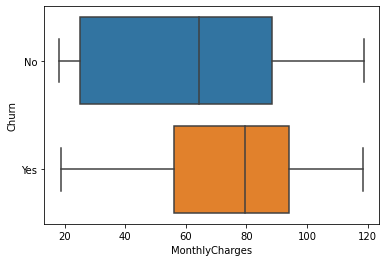

In [67]:
sns.boxplot(data=dataCopy, x='MonthlyCharges', y='Churn')

**Observartions:**<br/>
From the above boxplot for Monthly Charges against Churn we can observe.
* The IQR of monthly charges for customers who left/churned is less compared to the IQR for the customers who didn't left/churned.

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

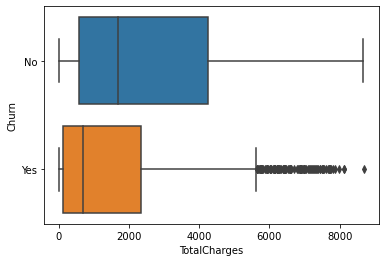

In [68]:
sns.boxplot(data=dataCopy, x='TotalCharges', y='Churn')

**Observations:**<br/>
* The IQR of Total charges for customers who left/churned is less compared to the IQR for the customers who didn't left/churned.
* There are outliers for the total charges attribute for the customers who churned.

### Multivariate Analysis 

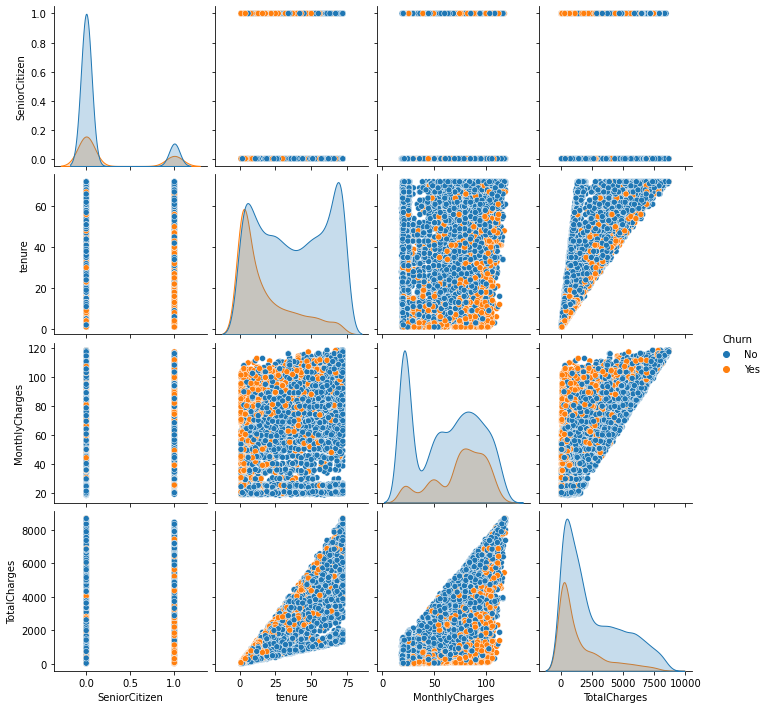

In [69]:
sns.pairplot(data=dataCopy, hue='Churn', diag_kind='kde')

**Observations:**<br/>
* More number of customers with high Monthly charges with less tenure have churned compared to the customers with less monthly charges.
* Senior citizens with less total charges have churned more compared to senior citizens with high total charges.
* Senior citizens with less tenure have churned more compared to senior citizens with high tenure.


## Data pre-processing: 

In [70]:
X = data.drop(labels=['Churn'], axis=1)
y = data['Churn']

In [71]:
y.value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

**Observations:**<br/>
We can see there is imbalance in the target variable in our data. 73% are who didn't churn and only 27% have churned.
This will impact the performance of model while predicting.

We can deal with it by generating synthesized data for the minor class or by increasing the class weight for the minor class while model build. Here, we will deal with the unbalanced target variable using the class weight while building the model.

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y, shuffle=True)

**Check if the train and test data have similar statistical characteristics when compared with original data.**

**Train Data vs Test Data vs Original Data**

**Null Hypothesis**<br/>
H0: There is no difference between Total Charges for Customer who churned and who didn't.<br/>
H1: There is significant difference between Total Charges for Customers who churned and who didn't.

In [73]:
significance_level = 0.05

sample1_original_data = dataCopy[dataCopy['Churn'] == 0]['TotalCharges']
sample2_original_data = dataCopy[dataCopy['Churn'] == 1]['TotalCharges']

sample1_train_data = X_train[y_train == 0]['TotalCharges']
sample2_train_data = X_train[y_train == 1]['TotalCharges']

sample1_test_data = X_test[y_test == 0]['TotalCharges']
sample2_test_data = X_test[y_test == 1]['TotalCharges']

In [74]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(sample1_original_data, sample2_original_data)

if p_value < significance_level:
    print(f'As the p_value {round(p_value, 4)} <= {significance_level} alpha, we reject the null hypothesis on original data')
else:
    print(f'As the p_value {round(p_value, 4)} > {significance_level} alpha, we fail to reject null hypothesis on original data')

As the p_value nan > 0.05 alpha, we fail to reject null hypothesis on original data


In [75]:
stat, p_value = ttest_ind(sample1_train_data, sample2_train_data)

if p_value < significance_level:
    print(f'As the p_value {round(p_value, 4)} <= {significance_level} alpha, we reject the null hypothesis on train data')
else:
    print(f'As the p_value {round(p_value, 4)} > {significance_level} alpha, we fail to reject null hypothesis on train data')

As the p_value 0.0 <= 0.05 alpha, we reject the null hypothesis on train data


In [76]:
stat, p_value = ttest_ind(sample1_test_data, sample2_test_data)

if p_value < significance_level:
    print(f'As the p_value {round(p_value, 4)} <= {significance_level} alpha, we reject the null hypothesis on test data')
else:
    print(f'As the p_value {round(p_value, 4)} > {significance_level} alpha, we fail to reject null hypothesis on test data')

As the p_value 0.0 <= 0.05 alpha, we reject the null hypothesis on test data


**Observations:**<br/>
We can see form the above hypothesis test result, the train and test data sets are statistically different than the original data set.

## Model training, testing and tuning: 

### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(criterion='entropy', random_state=1, bootstrap=True, oob_score=True, class_weight={0:1, 1:4})

model1.fit(X_train, y_train)

model1_prediction = model1.predict(X_test)

In [78]:
print(f'Accuracy score for Train data: {round(model1.score(X_train, y_train), 4)}')
print(f'Accuracy score for Test data: {round(model1.score(X_test, y_test), 4)}')

Accuracy score for Train data: 0.9974
Accuracy score for Test data: 0.7771


<AxesSubplot:>

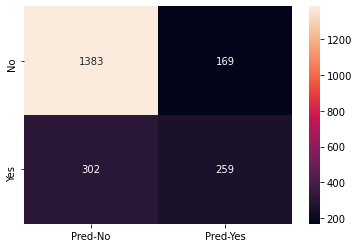

In [79]:
from sklearn.metrics import confusion_matrix, classification_report

model1_confusion_matrix = confusion_matrix(y_test, model1_prediction, labels=[0, 1])
df_model1_confusion_matrix = pd.DataFrame(model1_confusion_matrix, index=['No', 'Yes'], columns=['Pred-No', 'Pred-Yes'])

sns.heatmap(df_model1_confusion_matrix, annot=True, fmt='g')

In [80]:
print(classification_report(y_test, model1_prediction))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1552
           1       0.61      0.46      0.52       561

    accuracy                           0.78      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.76      0.78      0.77      2113



**Observations:**<br/>
From the above confusion matrix and classification reports for RandomForest model we can see
* Out of all the customer who didn't churn/left 1383 were predicted correctly where as 169 were predicted wrongly as left/churned.
* Out of all the customer who left/churned 259 were predicted correctly where as 302 were predicted wrongly as didn't left.
* The precision and recall values are prety low for positive class(i.e. Customers who churned).
* By looking at the scores for the train data and test data, it's clear the model has overfitted the train data and didn't performed well on test data set.

### AdaBoostClassifier 

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

dTree = DecisionTreeClassifier(criterion='entropy', class_weight={0:1, 1:4}, min_samples_split=5)

model2 = AdaBoostClassifier(base_estimator=dTree, random_state=1, learning_rate=0.1)

model2.fit(X_train, y_train)

model2_prediction = model2.predict(X_test)

In [82]:
print(f'Accuracy score for Train data: {round(model2.score(X_train, y_train), 4)}')
print(f'Accuracy score for Test data: {round(model2.score(X_test, y_test), 4)}')

Accuracy score for Train data: 0.997
Accuracy score for Test data: 0.7695


<AxesSubplot:>

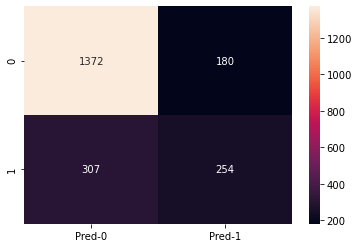

In [83]:
model2_confusion_matrix = confusion_matrix(y_test, model2_prediction, labels=[0, 1])
df_model2_confusion_matrix = pd.DataFrame(model2_confusion_matrix, index=['0', '1'], columns=['Pred-0', 'Pred-1'])

sns.heatmap(df_model2_confusion_matrix, annot=True, fmt='g')

In [84]:
print(classification_report(y_test, model2_prediction))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1552
           1       0.59      0.45      0.51       561

    accuracy                           0.77      2113
   macro avg       0.70      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113



**Observations:**<br/>
From the above confusion matrix and classification reports for AdaBoost classifier model we can see
* Out of all the customer who didn't churn/left 1372 were predicted correctly where as 180 were predicted wrongly as left/churned.
* Out of all the customer who left/churned 254 were predicted correctly where as 307 were predicted wrongly as didn't left.
* The precision and recall values are prety low for positive class(i.e. Customers who churned).
* From the scores for train and test data, we can see model has overfitted the train data and didn't perform well on test data.

### GradientBoostingClassifier 

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

model3 = GradientBoostingClassifier(random_state=1, max_features='sqrt')

model3.fit(X_train, y_train)

model3_prediction = model3.predict(X_test)

In [86]:
print(f'Accuracy score for Train data: {round(model3.score(X_train, y_train), 4)}')
print(f'Accuracy score for Test data: {round(model3.score(X_test, y_test), 4)}')

Accuracy score for Train data: 0.8227
Accuracy score for Test data: 0.8041


<AxesSubplot:>

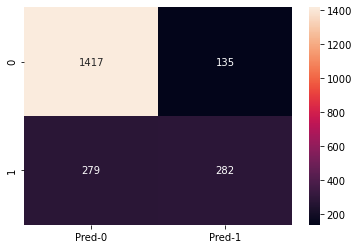

In [87]:
model3_confusion_matrix = confusion_matrix(y_test, model3_prediction, labels=[0, 1])
df_model3_confusion_matrix = pd.DataFrame(model3_confusion_matrix, index=['0', '1'], columns=['Pred-0', 'Pred-1'])

sns.heatmap(df_model3_confusion_matrix, annot=True, fmt='g')

In [88]:
print(classification_report(y_test, model3_prediction))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1552
           1       0.68      0.50      0.58       561

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



**Observations:**<br/>
From the above confusion matrix and classification reports for GradientBoostingClassifier model we can see
* Out of all the customer who didn't churn/left 1417 were predicted correctly where as 135 were predicted wrongly as left/churned.
* Out of all the customer who left/churned 282 were predicted correctly where as 279 were predicted wrongly as didn't left.
* The precision and recall values are prety low for positive class(i.e. Customers who churned).
* From the accuracy score of the model, we can see the model performed similarly on both train and test data.

### BaggingClassifier 

In [89]:
from sklearn.ensemble import BaggingClassifier

model4 = BaggingClassifier(base_estimator=dTree, n_estimators=100, oob_score=True, bootstrap=True, random_state=1)

model4.fit(X_train, y_train)

model4_prediction = model4.predict(X_test)

In [90]:
print(f'Accuracy score for Train data: {round(model4.score(X_train, y_train), 4)}')
print(f'Accuracy score for Test data: {round(model4.score(X_test, y_test), 4)}')

Accuracy score for Train data: 0.989
Accuracy score for Test data: 0.7757


<AxesSubplot:>

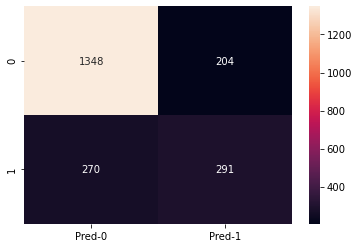

In [91]:
model4_confusion_matrix = confusion_matrix(y_test, model4_prediction, labels=[0, 1])
df_model4_confusion_matrix = pd.DataFrame(model4_confusion_matrix, index=['0', '1'], columns=['Pred-0', 'Pred-1'])

sns.heatmap(df_model4_confusion_matrix, annot=True, fmt='g')

In [92]:
print(classification_report(y_test, model4_prediction))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1552
           1       0.59      0.52      0.55       561

    accuracy                           0.78      2113
   macro avg       0.71      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



**Observations:**<br/>
From the above confusion matrix and classification reports for BaggingClassifier model we can see
* Out of all the customer who didn't churn/left 1348 were predicted correctly where as 204 were predicted wrongly as left/churned.
* Out of all the customer who left/churned 291 were predicted correctly where as 270 were predicted wrongly as didn't left.
* The precision and recall values are prety low for positive class(i.e. Customers who churned).
* From the scores, it's clear the model has overfitted on the train data and under performed on test data.

### Model Tuning 

**As the GradientBoostingClassifier model(i.e. model3) has performed similarly on train and test data and didn't overfit on the train data set like the other models. We'll select this model and try to tune it by tuning the hyperparameters.**

In [93]:
from sklearn.model_selection import GridSearchCV

hyper_param = {
    'learning_rate':[0.15, 0.1, 0.05, 0.01],
    'n_estimators':[50,100,500,1000]
}

tuning1 = GridSearchCV(estimator=model3, param_grid=hyper_param, verbose=1, n_jobs=-1)

tuning1.fit(X=X_train, y=y_train)

tuning1.best_params_, tuning1.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


({'learning_rate': 0.01, 'n_estimators': 500}, 0.8052738336713995)

In [94]:
hyper_param2 = {
    'max_depth':[2,3,4,5,6,7]
}

tuning2 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.01, n_estimators=500, random_state=1, max_features='sqrt'),
                      param_grid=hyper_param2, verbose=1, n_jobs=-1)

tuning2.fit(X_train, y_train)

tuning2.best_params_, tuning2.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


({'max_depth': 6}, 0.8054766734279919)

**Let's test our GradientBoostingClassifier model with all the above hyperparameter on the test data and check the performance**

In [95]:
model5 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, random_state=1, 
                                    max_features='sqrt', max_depth=6)

model5.fit(X_train, y_train)

model5_prediction = model5.predict(X_test)

In [96]:
print(f'Accuracy score for Train data: {round(model5.score(X_train, y_train), 4)}')
print(f'Accuracy score for Test data: {round(model5.score(X_test, y_test), 4)}')

Accuracy score for Train data: 0.8588
Accuracy score for Test data: 0.7993


<AxesSubplot:>

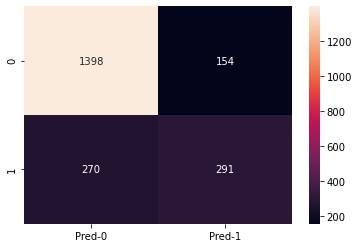

In [97]:
model5_confusion_matrix = confusion_matrix(y_test, model5_prediction, labels=[0, 1])
df_model5_confusion_matrix = pd.DataFrame(model5_confusion_matrix, index=['0', '1'], columns=['Pred-0', 'Pred-1'])

sns.heatmap(df_model5_confusion_matrix, annot=True, fmt='g')

In [98]:
print(classification_report(y_test, model5_prediction))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.65      0.52      0.58       561

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



**Observations:**<br/>
From the above classification report we can see the prediction for the positive class has increased after using the new hyper parameters.

In [99]:
# We'll use sample_weights for the unbalanced target attributes and see the performance of the model

sample_weights = np.zeros(len(y_train))
sample_weights[y_train == 0] = 1
sample_weights[y_train == 1] = 4

model6 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, random_state=1, 
                                    max_features='sqrt', max_depth=6)

model6.fit(X_train, y_train, sample_weight=sample_weights)

model6_prediction = model6.predict(X_test)

In [100]:
print(f'Accuracy score for Train data: {round(model6.score(X_train, y_train), 4)}')
print(f'Accuracy score for Test data: {round(model6.score(X_test, y_test), 4)}')

Accuracy score for Train data: 0.7988
Accuracy score for Test data: 0.7302


<AxesSubplot:>

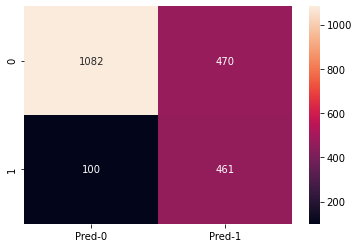

In [101]:
model6_confusion_matrix = confusion_matrix(y_test, model6_prediction, labels=[0, 1])
df_model6_confusion_matrix = pd.DataFrame(model6_confusion_matrix, index=['0', '1'], columns=['Pred-0', 'Pred-1'])

sns.heatmap(df_model6_confusion_matrix, annot=True, fmt='g')

In [102]:
print(classification_report(y_test, model6_prediction))

              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1552
           1       0.50      0.82      0.62       561

    accuracy                           0.73      2113
   macro avg       0.71      0.76      0.70      2113
weighted avg       0.80      0.73      0.75      2113



**Observations:**<br/>
As we can see by assigning weights to different class using sample_weights, the prediction for class 1(i.e. Customer who will churn) has increased. We can use this model as our final model.

* Out of all the customers who didn't churned/left, 1082 has been predicted correctly and 470 were wrongly predicted as they will left.
* Out of all the customer who left/churn telecom company, 461 were correctly predicted and 100 were wrongly predicted.

In [103]:
# Pickle the selected model for future use

with open('GBM_Model.pkl', 'wb') as file:
    pickled_model = pickle.dump(model6, file)

## GUI development: 

In [104]:
from tkinter import *
from tkinter import messagebox

# below imports are required if the GUI code is executed on a separate notebook
import pandas as pd
import pickle


window = Tk()
window.title('GUI')
window.geometry("400x540")
window.attributes('-topmost', True)

# Gender Selection Menu
Label(window, text='Gender').grid(row=0, sticky='w')

genderOptions = ["Male", "Female"]

genderValue = StringVar(window)
genderValue.set('Male')

genderOptionMenu = OptionMenu(window, genderValue, *genderOptions)
genderOptionMenu.grid(row=0, column=1, padx=50)
genderOptionMenu.config(width=17)

#Senior Citizen selection menu
Label(window, text='Senior Citizen').grid(row=1, sticky='w')

seniorCitizenOptions = ["0", "1"]

seniorCitizenValue = StringVar(window)
seniorCitizenValue.set('0')

seniorCitizenOptionMenu = OptionMenu(window, seniorCitizenValue, *seniorCitizenOptions)
seniorCitizenOptionMenu.grid(row=1, column=1, padx=50)
seniorCitizenOptionMenu.config(width=17)

#Partner selection menu
Label(window, text='Partner').grid(row=2, sticky='w')

partnerOptions = ['Yes', 'No']

partnerValue = StringVar(window)
partnerValue.set('No')

partnerOptionMenu = OptionMenu(window, partnerValue, *partnerOptions)
partnerOptionMenu.grid(row=2, column=1, padx=50)
partnerOptionMenu.config(width=17)

#Dependents selection menu
Label(window, text='Dependents').grid(row=3, sticky='w')

dependentOptions = ['Yes', 'No']

dependentValue = StringVar(window)
dependentValue.set('No')

dependentOptionMenu = OptionMenu(window, dependentValue, *dependentOptions)
dependentOptionMenu.grid(row=3, column=1, padx=50)
dependentOptionMenu.config(width=17)

#Tenure input field
Label(window, text='Tenure').grid(row=4, sticky='w')

tenureVar = IntVar()

tenureEntry = Entry(window, textvariable=tenureVar)
tenureEntry.config(width=21)
tenureEntry.grid(row=4, column=1)

#Phone Services selection menu
Label(window, text='Phone Services').grid(row=5, sticky='w')

phoneServicesOptions = ['Yes', 'No']

phoneServicesValue = StringVar(window)
phoneServicesValue.set('No')

phoneServicesOptionMenu = OptionMenu(window, phoneServicesValue, *phoneServicesOptions)
phoneServicesOptionMenu.grid(row=5, column=1, padx=50)
phoneServicesOptionMenu.config(width=17)

#Multiple Lines selection menu
Label(window, text='Multiple Lines').grid(row=6, sticky='w')

multipleLinesOptions = ['Yes', 'No']

multipleLinesValue = StringVar(window)
multipleLinesValue.set('No')

multipleLinesOptionMenu = OptionMenu(window, multipleLinesValue, *multipleLinesOptions)
multipleLinesOptionMenu.grid(row=6, column=1, padx=50)
multipleLinesOptionMenu.config(width=17)

#Internet Service selection menu
Label(window, text='Internet Service').grid(row=7, sticky='w')

internetServiceOptions = ['No', 'DSL', 'Fiber optic']

internetServiceValue = StringVar(window)
internetServiceValue.set('No')

internetServiceOptionMenu = OptionMenu(window, internetServiceValue, *internetServiceOptions)
internetServiceOptionMenu.grid(row=7, column=1, padx=50)
internetServiceOptionMenu.config(width=17)

#Online Security selection menu
Label(window, text='Online Security').grid(row=8, sticky='w')

onlineSecurityOptions = ['No', 'Yes', 'No internet service']

onlineSecurityValue = StringVar(window)
onlineSecurityValue.set('No')

onlineSecurityOptionMenu = OptionMenu(window, onlineSecurityValue, *onlineSecurityOptions)
onlineSecurityOptionMenu.grid(row=8, column=1, padx=50)
onlineSecurityOptionMenu.config(width=17)

#Online Backup selection menu
Label(window, text='Online Backup').grid(row=9, sticky='w')

onlineBackupOptions = ['No', 'Yes', 'No internet service']

onlineBackupValue = StringVar(window)
onlineBackupValue.set('No')

onlineBackupOptionMenu = OptionMenu(window, onlineBackupValue, *onlineBackupOptions)
onlineBackupOptionMenu.grid(row=9, column=1, padx=50)
onlineBackupOptionMenu.config(width=17)

#Device Protection selection menu
Label(window, text='Device Protection').grid(row=10, sticky='w')

deviceProtectionOptions = ['No', 'Yes', 'No internet service']

deviceProtectionValue = StringVar(window)
deviceProtectionValue.set('No')

deviceProtectionOptionMenu = OptionMenu(window, deviceProtectionValue, *deviceProtectionOptions)
deviceProtectionOptionMenu.grid(row=10, column=1, padx=50)
deviceProtectionOptionMenu.config(width=17)

#Tech Support selection menu
Label(window, text='Tech Support').grid(row=11, sticky='w')

techSupportOptions = ['No', 'Yes', 'No internet service']

techSupportValue = StringVar(window)
techSupportValue.set('No')

techSupportOptionMenu = OptionMenu(window, techSupportValue, *techSupportOptions)
techSupportOptionMenu.grid(row=11, column=1, padx=50)
techSupportOptionMenu.config(width=17)

#Streaming TV selection menu
Label(window, text='Streaming TV').grid(row=12, sticky='w')

streamingTVOptions = ['No', 'Yes', 'No internet service']

streamingTVValue = StringVar(window)
streamingTVValue.set('No')

streamingTVOptionMenu = OptionMenu(window, streamingTVValue, *streamingTVOptions)
streamingTVOptionMenu.grid(row=12, column=1, padx=50)
streamingTVOptionMenu.config(width=17)

#Streaming Movies selection menu
Label(window, text='Streaming Movies').grid(row=13, sticky='w')

streamingMoviesOptions = ['No', 'Yes', 'No internet service']

streamingMoviesValue = StringVar(window)
streamingMoviesValue.set('No')

streamingMoviesOptionMenu = OptionMenu(window, streamingMoviesValue, *streamingMoviesOptions)
streamingMoviesOptionMenu.grid(row=13, column=1, padx=50)
streamingMoviesOptionMenu.config(width=17)

#Contract selection menu
Label(window, text='Contract').grid(row=14, sticky='w')

contractOptions = ['Month-to-month', 'One year', 'Two year']

contractValue = StringVar(window)
contractValue.set('Month-to-month')

contractOptionMenu = OptionMenu(window, contractValue, *contractOptions)
contractOptionMenu.grid(row=14, column=1, padx=50)
contractOptionMenu.config(width=17)

#Paperless Billing menu
Label(window, text='Paperless Billing').grid(row=15, sticky='w')

paperlessBillingOptions = ['No', 'Yes']

paperlessBillingValue = StringVar(window)
paperlessBillingValue.set('No')

paperlessBillingOptionMenu = OptionMenu(window, paperlessBillingValue, *paperlessBillingOptions)
paperlessBillingOptionMenu.grid(row=15, column=1, padx=50)
paperlessBillingOptionMenu.config(width=17)

#Payment Method menu
Label(window, text='Payment Method').grid(row=16, sticky='w')

paymentMethodOptions = ['Mailed check', 'Electronic check', 'Bank transfer (automatic)', 'Credit card (automatic)']

paymentMethodValue = StringVar(window)
paymentMethodValue.set('Mailed check')

paymentMethodOptionMenu = OptionMenu(window, paymentMethodValue, *paymentMethodOptions)
paymentMethodOptionMenu.grid(row=16, column=1, padx=50)
paymentMethodOptionMenu.config(width=17)

#Monthly Charges field
Label(window, text='Monthly Charges').grid(row=17, sticky='w')

monthlyChargesVar = DoubleVar()

monthlyChargesEntry = Entry(window, textvariable=monthlyChargesVar)
monthlyChargesEntry.config(width=21)
monthlyChargesEntry.grid(row=17, column=1)

#Total Charges field
Label(window, text='Total Charges').grid(row=18, sticky='w')

totalChargesVar = DoubleVar()

totalChargesEntry = Entry(window, textvariable=totalChargesVar)
totalChargesEntry.config(width=21)
totalChargesEntry.grid(row=18, column=1)

#Event handler method for the Submit button
def prepareData():
    
    global inputData
    
    dataDict = {
        'Gender': genderValue.get(), 'SeniorCitizen': seniorCitizenValue.get(), 'Partner': partnerValue.get(),
        'Dependents': dependentValue.get(), 'Tenure': tenureVar.get(), 'PhoneService': phoneServicesValue.get(),
        'MultipleLines': multipleLinesValue.get(), 'InternetService': internetServiceValue.get(),
        'OnlineSecurity': onlineSecurityValue.get(), 'OnlineBackup': onlineBackupValue.get(),
        'DeviceProtection': deviceProtectionValue.get(), 'TechSupport': techSupportValue.get(),
        'StreamingTV': streamingTVValue.get(), 'StreamingMovies': streamingMoviesValue.get(),
        'Contract': contractValue.get(), 'PaperlessBilling': paperlessBillingValue.get(),
        'PaymentMethod': paymentMethodValue.get(), 'MonthlyCharges': monthlyChargesVar.get(),
        'TotalCharges': totalChargesVar.get()
    }
    
    inputData = pd.DataFrame(dataDict, index=[0])
    
    inputData['SeniorCitizen'] = pd.to_numeric(inputData['SeniorCitizen'], errors='coerce')
    
    replaceStruct = {
        'Contract':{'Month-to-month':1, 'One year':2, 'Two year':3},
        'PaymentMethod':{'Mailed check':'manual', 'Electronic check':'manual', 'Bank transfer (automatic)':'automatic', 
                     'Credit card (automatic)':'automatic'},
    
        # For MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
        # columns, we can consider No internet service as No
        'MultipleLines':{'No phone service':'No'},
        'OnlineSecurity':{'No internet service':'No'},
        'OnlineBackup':{'No internet service':'No'},
        'DeviceProtection':{'No internet service':'No'},
        'TechSupport':{'No internet service':'No'},
        'StreamingTV':{'No internet service':'No'},
        'StreamingMovies':{'No internet service':'No'},
    }
    
    # Perform the LabelEncoding on the input data
    inputData = inputData.replace(replaceStruct)
    
    # Change the datatype of categorical columns/attributes
    for column in inputData.columns:
        if inputData[column].dtype == object:
            inputData[column] = pd.Categorical(inputData[column])
    
    # Load the pickled values from previous built model for imputing missing/zero values on numerical columns
    with open('imputerVar.pkl', 'rb') as file:
        imputeVar = pickle.load(file)
    
    # Impute the missing/zero values for the numerical columns with respective medians
    if tenureVar.get() == 0:
        inputData['Tenure'] = inputData['Tenure'].replace(0, imputeVar['tenureMedian'])
        
    if monthlyChargesVar.get() == 0.0:
        inputData['MonthlyCharges'] = inputData['MonthlyCharges'].replace(0.0, imputeVar['monthlyChargesMedian'])
        
    if totalChargesVar.get() == 0.0:
        inputData['TotalCharges'] = inputData['TotalCharges'].replace(0.0, imputeVar['totalChargesMedian'])
        
    # Load the pickled oneHotEncoder from previous built model for perfoming OneHotEncoding for categorical variables
    with open('oneHotEncoder.pkl', 'rb') as file:
        oneHotEncoder = pickle.load(file)
        
    # Perform OneHotEncoding for categorical columns
    oneHotEncodedValues = oneHotEncoder.transform(inputData[['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'PaperlessBilling', 'PaymentMethod']])

    oneHotEncodedFeatures = oneHotEncoder.get_feature_names(['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'PaperlessBilling', 'PaymentMethod'])
    
    df_OneHotEncodedValues = pd.DataFrame(oneHotEncodedValues, columns=oneHotEncodedFeatures)
    
    oneHotCols = ['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'PaperlessBilling', 'PaymentMethod']
    
    inputData = inputData.drop(labels=oneHotCols, axis=1)
    
    inputData = inputData.join(df_OneHotEncodedValues)

# Submit button
submitBtn = Button(window, text='Submit', command=prepareData)
submitBtn.config(width=7)
submitBtn.grid(row=19)

#Event handler method for Predict button
def predict():
    # Load the pickled model
    with open('GBM_Model.pkl', 'rb') as file:
        model = pickle.load(file)
        
    try:
        inputData
        
        prediction = model.predict(inputData.iloc[:, :])[0]
        
        if prediction == 0:
            predictVar.set('No')
        elif prediction == 1:
            predictVar.set('Yes')
            
    except NameError:
        messagebox.showwarning('Warning!', 'Please submit the input!!!', parent=window)
    
# Predict button
predictBtn = Button(window, text='Predict', command=predict)
predictBtn.config(width=7)
predictBtn.grid(row=20)

# Predict Entry
predictVar = StringVar(window)
predictVar.set('')


predictEntry = Entry(window, textvariable=predictVar)
predictEntry.config(width=21)
predictEntry.grid(row=20, column=1)

mainloop()

## Conclusion and improvisation:  

**Conclusion:**<br/>
* Post tuning of the hyper parameter, the performance of the gradientboosting model has imporved for the prediction of the customers who will churn/left the telecom company.
* We choose the gradientboosting model as the model didn't overfit the train data and performed similarly on test data.

**Improvisation:**<br/>
* There were missing values for the Total Charges, which we had to impute using the median.
* There were Zeros for the tenure feature, which had to be imputed using median.
* The target variable(Churn) was highly unbalanced, so may be more records should be collected for the customers who have churned.
* There were outliers present in the TotalCharges attribute for the customers who churned, which could be typo while collecting the data.